In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

%matplotlib inline
warnings.simplefilter(action='ignore', category=FutureWarning)

### 5

In [2]:
# Generate data
x1 = np.random.uniform(size=500)-0.5
x2 = np.random.uniform(size=500)-0.5
y = 1*(x1**2 - x2**2 >0)

df = pd.DataFrame(dict(x1=x1,x2=x2,y=y))

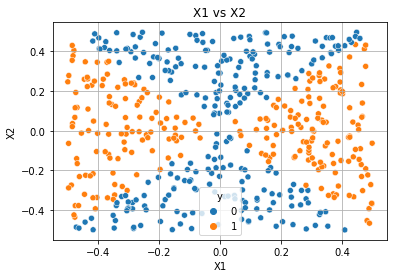

In [3]:
# Plot data
fig,ax = plt.subplots(1,1)
ax = sns.scatterplot('x1', 'x2', data=df, hue='y')
ax.set(title = 'X1 vs X2', xlabel = 'X1', ylabel='X2')
ax.grid(True)

In [4]:
# Create X and y objects
X = df.drop('y', axis=1)
y = df.y

In [5]:
# Fit logistic regression
glm = LogisticRegression()
glm_model = glm.fit(X,y)
glm_preds = glm_model.predict(X)

df['Predicted_glm'] = glm_preds
df.head()

,x1,x2,y,Predicted_glm
0,-0.419482,0.230033,1,0
1,0.086527,0.401042,0,0
2,0.339757,-0.176867,1,1
3,-0.345052,-0.323252,1,0
4,-0.369937,0.345439,1,0


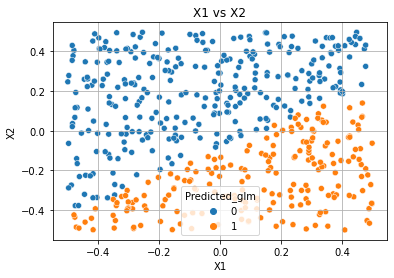

In [6]:
# Plot data with predicted class labels
fig,ax = plt.subplots(1,1)
ax = sns.scatterplot('x1', 'x2', data=df, hue='Predicted_glm')
ax.set(title = 'X1 vs X2', xlabel = 'X1', ylabel='X2')
ax.grid(True)

In [8]:
# Transform data using polynomial degree 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit logistic regression on transformed data
glm = LogisticRegression()
glm_model = glm.fit(X_poly,y)
glm_preds = glm_model.predict(X_poly)

df['Predicted_glm_poly'] = glm_preds

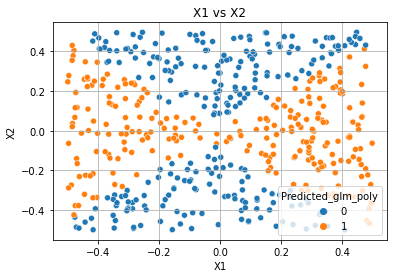

In [10]:
# Plot data with predicted class labels
fig,ax = plt.subplots(1,1)
ax = sns.scatterplot('x1', 'x2', data=df, hue='Predicted_glm_poly')
ax.set(title = 'X1 vs X2', xlabel = 'X1', ylabel='X2')
ax.grid(True)

In [11]:
# Fit SVC with linear kernel
svc = SVC(kernel = 'linear')
svc_model = svc.fit(X,y)
svc_preds = svc_model.predict(X)

df['Predicted_svc'] = svc_preds

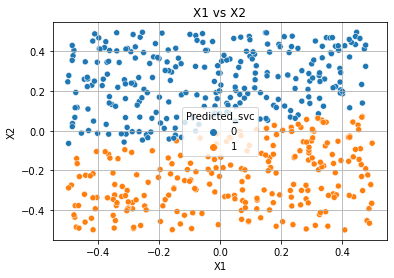

In [12]:
# Plot data with predicted class labels
fig,ax = plt.subplots(1,1)
ax = sns.scatterplot('x1', 'x2', data=df, hue='Predicted_svc')
ax.set(title = 'X1 vs X2', xlabel = 'X1', ylabel='X2')
ax.grid(True)

In [13]:
# Fit SVC with linear kernel
svm = SVC(kernel = 'rbf')
svm_model = svm.fit(X,y)
svm_preds = svm_model.predict(X)

df['Predicted_svm'] = svm_preds

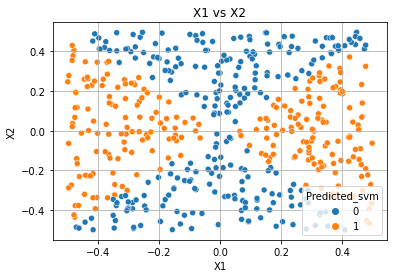

In [14]:
# Plot data with predicted class labels
fig,ax = plt.subplots(1,1)
ax = sns.scatterplot('x1', 'x2', data=df, hue='Predicted_svm')
ax.set(title = 'X1 vs X2', xlabel = 'X1', ylabel='X2')
ax.grid(True)

### 7

In [19]:
# Load dataset and prepare response variable
auto = pd.read_csv('../../data/Auto.csv')

med_mpg = np.median(auto.mpg)
auto['mpg_above_med'] = [1 if row > med_mpg else 0 for row in auto.mpg]

auto = auto.drop('name', axis=1)

auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg_above_med
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0


In [20]:
# Create X, y objects and split into training/validation
X = auto.drop('mpg_above_med', axis=1)
y = auto.mpg_above_med

X_train, X_valid, y_train, y_valid = train_test_split(X,y, random_state=0)

In [24]:
# Fit SVC classifier with varying C parameters
Cs = [0.001,0.01,0.1,1.0]
scores = []

for c in Cs:
    svc = SVC(kernel='linear',C=c)
    svc_model = svc.fit(X_train,y_train)
    svc_preds = svc_model.predict(X_valid)
    score = accuracy_score(y_valid, svc_preds)
    scores.append(score)
    
scores = pd.Series(scores, index = Cs)
print(f'Cost value with maximum accuracy: {scores.idxmax()}')

Cost value with maximum accuracy: 1.0


In [27]:
# Fit SVM with varying C, gamma parameters and rbf kernel
svm_params = {'kernel': ['rbf'], 'C': [0.001,0.01,0.1,1.0,10.0,100.0], 'gamma': [1,0.1,0.01,0.001,0.0001]}
svm = SVC(random_state = 1000)
svm_cv = GridSearchCV(svm, svm_params)
svm_cv.fit(X_train,y_train)

print(f'Best parameters: {svm_cv.best_params_}') 
svm_cv_preds = svm_cv.predict(X_valid) 
score = accuracy_score(y_valid, svm_cv_preds)
print(f'Score from optimized SVM: {accuracy_score(y_valid, svm_cv_preds)}')

Best parameters: {'C': 100.0, 'gamma': 0.0001, 'kernel': 'rbf'}
Score from optimized SVM: 0.8673469387755102


In [28]:
# Fit SVM with varying C, gamma, degree parameters and poly kernel
svm_params = {'kernel': ['poly'], 'C': [0.001,0.01,0.1,1.0,10.0,100.0], 'gamma': [1,0.1,0.01,0.001,0.0001], 'degree': [2,3,4,5]}
svm = SVC(random_state = 1000)
svm_cv = GridSearchCV(svm, svm_params)
svm_cv.fit(X_train,y_train)

print(f'Best parameters: {svm_cv.best_params_}') 
svm_cv_preds = svm_cv.predict(X_valid) 
score = accuracy_score(y_valid, svm_cv_preds)
print(f'Score from optimized SVM: {accuracy_score(y_valid, svm_cv_preds)}')

Best parameters: {'C': 0.01, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly'}
Score from optimized SVM: 0.9897959183673469


### 8 

In [33]:
# Load dataset
oj = pd.read_csv('../../data/OJ.csv')
oj.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [34]:
# Prepare dataset

# Conver response variable to 0,1 since sklearn can't handle categorical data
oj['Purchase'] = [1 if row == "CH" else 0 for row in oj.Purchase]
oj = pd.get_dummies(oj)

# Create X and y objects
X = oj.drop('Purchase', axis=1)
y = oj.Purchase

# Split into test and training set
X_train, X_valid, y_train, y_valid = train_test_split(X,y,random_state=100, test_size=0.2)

In [35]:
# Fit Support Vector Classifier
svc = SVC(random_state=100, kernel='linear', C=0.01)
svc_model = svc.fit(X_train,y_train)

svc_train_preds = svc_model.predict(X_train)
train_score = accuracy_score(y_train,svc_train_preds)
print(f'Training Set Accuracy: {train_score}')

svc_valid_preds = svc_model.predict(X_valid)
valid_score = accuracy_score(y_valid,svc_valid_preds)
print(f'Validation Set Accuracy: {valid_score}')

Training Set Accuracy: 0.7663551401869159
Validation Set Accuracy: 0.719626168224299


In [48]:
# Tune above SVC
Cs = [0.001,0.01,0.1,1.0,10.0]
scores = []

for c in Cs:
    svc = SVC(random_state=100, kernel='linear',C=c)
    svc_model = svc.fit(X_train,y_train)
    svc_preds = svc_model.predict(X_valid)
    score = accuracy_score(y_valid, svc_preds)
    scores.append(score)
    
scores = pd.Series(scores, index = Cs)
print(f'Cost value with maximum validation accuracy: {scores.idxmax()} , Validation Accuracy: {scores.max()}')

Cost value with maximum validation accuracy: 1.0 , Validation Accuracy: 0.8644859813084113


In [40]:
# Fit Support Vector Classifier
svc = SVC(random_state=100, kernel='linear', C=scores.idxmax())
svc_model = svc.fit(X_train,y_train)

svc_train_preds = svc_model.predict(X_train)
train_score = accuracy_score(y_train,svc_train_preds)
print(f'Training Set Accuracy: {train_score}')

svc_valid_preds = svc_model.predict(X_valid)
valid_score = accuracy_score(y_valid,svc_valid_preds)
print(f'Validation Set Accuracy: {valid_score}')

Training Set Accuracy: 0.8282710280373832
Validation Set Accuracy: 0.8644859813084113


In [52]:
# Fit SVM with radial kernel and optimize it
Cs = [0.001,0.01,0.1,1.0,10.0]
scores = []

for c in Cs:
    svm = SVC(random_state=100, kernel='rbf',C=c)
    svm_model = svm.fit(X_train,y_train)
    svm_preds = svm_model.predict(X_valid)
    score = accuracy_score(y_valid, svm_preds)
    scores.append(score)
    
scores = pd.Series(scores, index = Cs)
print(f'Cost value with maximum validation accuracy: {scores.idxmax()} , Validation Accuracy: {scores.max()}')

Cost value with maximum validation accuracy: 0.001 , Validation Accuracy: 0.5981308411214953


In [53]:
# Fit Support Vector Machine
svm = SVC(random_state=100, kernel='rbf', C=scores.idxmax())
svm_model = svm.fit(X_train,y_train)

svm_train_preds = svm_model.predict(X_train)
train_score = accuracy_score(y_train,svm_train_preds)
print(f'Training Set Accuracy: {train_score}')

svm_valid_preds = svm_model.predict(X_valid)
valid_score = accuracy_score(y_valid,svm_valid_preds)
print(f'Validation Set Accuracy: {valid_score}')

Training Set Accuracy: 0.6133177570093458
Validation Set Accuracy: 0.5981308411214953


In [46]:
# Fit SVM with polynomial kernel and optimize it
Cs = [0.001,0.01,0.1,1.0,10.0]
scores = []

for c in Cs:
    svm = SVC(random_state=100, kernel='poly',C=c, degree=2)
    svm_model = svm.fit(X_train,y_train)
    svm_preds = svm_model.predict(X_valid)
    score = accuracy_score(y_valid, svm_preds)
    scores.append(score)
    
scores = pd.Series(scores, index = Cs)
print(f'Cost value with maximum validation accuracy: {scores.idxmax()} , Validation Accuracy: {scores.max()}')

Cost value with maximum validation accuracy: 0.001 , Validation Accuracy: 0.5981308411214953


In [54]:
# Fit Support Vector Classifier
svm = SVC(random_state=100, kernel='poly', degree=2, C=scores.idxmax())
svm_model = svm.fit(X_train,y_train)

svm_train_preds = svm_model.predict(X_train)
train_score = accuracy_score(y_train,svm_train_preds)
print(f'Training Set Accuracy: {train_score}')

svm_valid_preds = svm_model.predict(X_valid)
valid_score = accuracy_score(y_valid,svm_valid_preds)
print(f'Validation Set Accuracy: {valid_score}')

Training Set Accuracy: 0.6133177570093458
Validation Set Accuracy: 0.5981308411214953
